In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [3]:
import MDAnalysis as mda
import prolif as plf
import numpy as np
import pandas as pd
from rdkit import DataStructs
import glob
from tqdm import tqdm
import os
import seaborn as sns
import datamol as dm
import rdkit
import matplotlib.pyplot as plt
import torch
import warnings
from rdkit.Chem import AllChem
from copy import deepcopy
import rdkit.Chem as Chem

from src.data.datasets import *
from utils.interactions import (
    merge_interaction_dfs,
    generate_interaction_df,
    calculate_interaction_similarity,
)

[autoreload of src.utils.constants failed: Traceback (most recent call last):
  File "/home/cch57/micromamba/envs/poses/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/cch57/micromamba/envs/poses/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/home/cch57/micromamba/envs/poses/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen importlib._bootstrap_external>", line 1004, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/cch57/projects/poses_benchmark/src/utils/constants.py

ModuleNotFoundError: No module named 'utils'

## Main

In [ ]:
# load datasets
crossdocked_generated = DockedMolsDataset("crossdocked_test", docked=False)
crossdocked_docked = DockedMolsDataset("crossdocked_test", docked=True)

diffsbdd_generated = DiffSBDDSamples(docked=False)
diffsbdd_docked = DiffSBDDSamples(docked=True)

targetdiff_generated = DockedMolsDataset("targetdiff", docked=False)
targetdiff_docked = DockedMolsDataset("targetdiff", docked=True)

p2m_generated = DockedMolsDataset("pocket2mol", docked=False)
p2m_docked = DockedMolsDataset("pocket2mol", docked=True)

sbdd_generated = DockedMolsDataset("ar", docked=False)
sbdd_docked = DockedMolsDataset("ar", docked=True)

cvae_generated = DockedMolsDataset("cvae", docked=False)
cvae_docked = DockedMolsDataset("cvae", docked=True)

In [5]:
crossdocked_generated = RedockedData("crossdocked_test", "score_only", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
crossdocked_minimized = RedockedData("crossdocked_test", "minimized", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
crossdocked_docked = RedockedData("crossdocked_test", "redocked", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)

diffsbdd_generated = RedockedData("diffsbdd", "score_only", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
diffsbdd_minimized = RedockedData("diffsbdd", "minimized", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
diffsbdd_docked = RedockedData("diffsbdd", "redocked", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)

targetdiff_generated = RedockedData("targetdiff", "score_only", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
targetdiff_minimized = RedockedData("targetdiff", "minimized", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
targetdiff_docked = RedockedData("targetdiff", "redocked", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)

p2m_generated = RedockedData("pocket2mol", "score_only", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
p2m_minimized = RedockedData("pocket2mol", "minimized", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
p2m_docked = RedockedData("pocket2mol", "redocked", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)

sbdd_generated = RedockedData("ar", "score_only", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
sbdd_minimized = RedockedData("ar", "minimized", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
sbdd_docked = RedockedData("ar", "redocked", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)

cvae_generated = RedockedData("cvae", "score_only", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
cvae_minimized = RedockedData("cvae", "minimized", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
cvae_docked = RedockedData("cvae", "redocked", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)

In [6]:
flag_generated = RedockedData("flag", "score_only", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
flag_minimized = RedockedData("flag", "minimized", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
flag_docked = RedockedData("flag", "redocked", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)

decompdiff_generated = RedockedData("decompdiff", "score_only", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
decompdiff_minimized = RedockedData("decompdiff", "minimized", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)
decompdiff_docked = RedockedData("decompdiff", "redocked", docking_data=DOCKING_DATA, protein_data=PROTEIN_DATA)

In [15]:
crossdocked_generated_interactions = crossdocked_generated.all_interactions
crossdocked_minimized_interactions = crossdocked_minimized.all_interactions
crossdocked_docked_interactions = crossdocked_docked.all_interactions

diffsbdd_generated_interactions = diffsbdd_generated.all_interactions
diffsbdd_minimized_interactions = diffsbdd_minimized.all_interactions
diffsbdd_docked_interactions = diffsbdd_docked.all_interactions

targetdiff_generated_interactions = targetdiff_generated.all_interactions
targetdiff_minimized_interactions = targetdiff_minimized.all_interactions
targetdiff_docked_interactions = targetdiff_docked.all_interactions

p2m_generated_interactions = p2m_generated.all_interactions
p2m_minimized_interactions = p2m_minimized.all_interactions
p2m_docked_interactions = p2m_docked.all_interactions

sbdd_generated_interactions = sbdd_generated.all_interactions
sbdd_minimized_interactions = sbdd_minimized.all_interactions
sbdd_docked_interactions = sbdd_docked.all_interactions

cvae_generated_interactions = cvae_generated.all_interactions
cvae_minimized_interactions = cvae_minimized.all_interactions
cvae_docked_interactions = cvae_docked.all_interactions

flag_generated_interactions = flag_generated.all_interactions
flag_minimized_interactions = flag_minimized.all_interactions
flag_docked_interactions = flag_docked.all_interactions

decompdiff_generated_interactions = decompdiff_generated.all_interactions
decompdiff_minimized_interactions = decompdiff_minimized.all_interactions
decompdiff_docked_interactions = decompdiff_docked.all_interactions

crossdocked_test_score_only: Number of None values: 0
crossdocked_test_minimized: Number of None values: 1
crossdocked_test_redocked: Number of None values: 0
diffsbdd_score_only: Number of None values: 0
diffsbdd_minimized: Number of None values: 0
diffsbdd_redocked: Number of None values: 0
targetdiff_score_only: Number of None values: 1
targetdiff_minimized: Number of None values: 0
targetdiff_redocked: Number of None values: 0
pocket2mol_score_only: Number of None values: 0
pocket2mol_minimized: Number of None values: 0
pocket2mol_redocked: Number of None values: 0
ar_score_only: Number of None values: 0
ar_minimized: Number of None values: 0
ar_redocked: Number of None values: 0
cvae_score_only: Number of None values: 0
cvae_minimized: Number of None values: 0
cvae_redocked: Number of None values: 0
flag_score_only: Number of None values: 0
flag_minimized: Number of None values: 10734
flag_redocked: Number of None values: 0
decompdiff_score_only: Number of None values: 0
decompdif

In [8]:
def refactor_interaction_df(dfs):
    return pd.concat(
        [
            df.groupby(level=2, axis=1).sum()
            for df in dfs
            if df is not None and df.sum().shape[0]
        ],
        axis=0,
    )

### Interaction fingerprint analysis

In [16]:
df_crossdocked_generated = refactor_interaction_df(crossdocked_generated_interactions)
df_crossdocked_minimized = refactor_interaction_df(crossdocked_minimized_interactions)
df_crossdocked_docked = refactor_interaction_df(crossdocked_docked_interactions)

df_diffsbdd_generated = refactor_interaction_df(diffsbdd_generated_interactions)
df_diffsbdd_minimized = refactor_interaction_df(diffsbdd_minimized_interactions)
df_diffsbdd_docked = refactor_interaction_df(diffsbdd_docked_interactions)

df_targetdiff_generated = refactor_interaction_df(targetdiff_generated_interactions)
df_targetdiff_minimized = refactor_interaction_df(targetdiff_minimized_interactions)
df_targetdiff_docked = refactor_interaction_df(targetdiff_docked_interactions)

df_p2m_generated = refactor_interaction_df(p2m_generated_interactions)
df_p2m_minimized = refactor_interaction_df(p2m_minimized_interactions)
df_p2m_docked = refactor_interaction_df(p2m_docked_interactions)

df_sbdd_generated = refactor_interaction_df(sbdd_generated_interactions)
df_sbdd_minimized = refactor_interaction_df(sbdd_minimized_interactions)
df_sbdd_docked = refactor_interaction_df(sbdd_docked_interactions)

df_cvae_generated = refactor_interaction_df(cvae_generated_interactions)
df_cvae_minimized = refactor_interaction_df(cvae_minimized_interactions)
df_cvae_docked = refactor_interaction_df(cvae_docked_interactions)

df_decompdiff_generated = refactor_interaction_df(decompdiff_generated_interactions)
df_decompdiff_minimized = refactor_interaction_df(decompdiff_minimized_interactions)
df_decompdiff_docked = refactor_interaction_df(decompdiff_docked_interactions)

df_flag_generated = refactor_interaction_df(flag_generated_interactions)
df_flag_minimized = refactor_interaction_df(flag_minimized_interactions)
df_flag_docked = refactor_interaction_df(flag_docked_interactions)

df_crossdocked_generated["Method"] = "CrossDocked"
df_crossdocked_minimized["Method"] = "CrossDocked"
df_crossdocked_docked["Method"] = "CrossDocked"

df_diffsbdd_generated["Method"] = "DiffSBDD"
df_diffsbdd_minimized["Method"] = "DiffSBDD"
df_diffsbdd_docked["Method"] = "DiffSBDD"

df_targetdiff_generated["Method"] = "TargetDiff"
df_targetdiff_minimized["Method"] = "TargetDiff"
df_targetdiff_docked["Method"] = "TargetDiff"

df_p2m_generated["Method"] = "Pocket2Mol"
df_p2m_minimized["Method"] = "Pocket2Mol"
df_p2m_docked["Method"] = "Pocket2Mol"

df_sbdd_generated["Method"] = "3DSBDD"
df_sbdd_minimized["Method"] = "3DSBDD"
df_sbdd_docked["Method"] = "3DSBDD"

df_cvae_generated["Method"] = "LiGAN"
df_cvae_minimized["Method"] = "LiGAN"
df_cvae_docked["Method"] = "LiGAN"

df_decompdiff_generated["Method"] = "DecompDiff"
df_decompdiff_minimized["Method"] = "DecompDiff"
df_decompdiff_docked["Method"] = "DecompDiff"

df_flag_generated["Method"] = "FLAG"
df_flag_minimized["Method"] = "FLAG"
df_flag_docked["Method"] = "FLAG"

df_crossdocked_generated["Type"] = "Generated"
df_crossdocked_minimized["Type"] = "Minimized"
df_crossdocked_docked["Type"] = "Redocked"

df_diffsbdd_generated["Type"] = "Generated"
df_diffsbdd_minimized["Type"] = "Minimized"
df_diffsbdd_docked["Type"] = "Redocked"

df_targetdiff_generated["Type"] = "Generated"
df_targetdiff_minimized["Type"] = "Minimized"
df_targetdiff_docked["Type"] = "Redocked"

df_p2m_generated["Type"] = "Generated"
df_p2m_minimized["Type"] = "Minimized"
df_p2m_docked["Type"] = "Redocked"

df_sbdd_generated["Type"] = "Generated"
df_sbdd_minimized["Type"] = "Minimized"
df_sbdd_docked["Type"] = "Redocked"

df_cvae_generated["Type"] = "Generated"
df_cvae_minimized["Type"] = "Minimized"
df_cvae_docked["Type"] = "Redocked"

df_decompdiff_generated["Type"] = "Generated"
df_decompdiff_minimized["Type"] = "Minimized"
df_decompdiff_docked["Type"] = "Redocked"

df_flag_generated["Type"] = "Generated"
df_flag_minimized["Type"] = "Minimized"
df_flag_docked["Type"] = "Redocked"

data = pd.concat(
    [
        df_crossdocked_generated,
        df_crossdocked_minimized,
        df_crossdocked_docked,
        df_diffsbdd_generated,
        df_diffsbdd_minimized,
        df_diffsbdd_docked,
        df_targetdiff_generated,
        df_targetdiff_minimized,
        df_targetdiff_docked,
        df_p2m_generated,
        df_p2m_minimized,
        df_p2m_docked,
        df_sbdd_generated,
        df_sbdd_minimized,
        df_sbdd_docked,
        df_cvae_generated,
        df_cvae_minimized,
        df_cvae_docked,
        
        df_decompdiff_generated,
        df_decompdiff_minimized,
        df_decompdiff_docked,
        
        df_flag_generated,
        df_flag_minimized,
        df_flag_docked,
    ],
    axis=0,
)

In [17]:
# get the median number of interactions per interaction per method to 2dp
means = data.groupby(["Method", "Type"]).mean().round(2)
means

interaction            HBAcceptor  HBDonor  Hydrophobic  VdWContact
Method      Type                                                   
3DSBDD      Generated        0.99     0.66         4.30        6.65
            Minimized        0.78     0.51         4.29        6.07
            Redocked         0.51     0.38         4.55        5.91
CrossDocked Generated        2.31     1.61         6.43        7.54
            Minimized        1.83     1.48         6.38        6.93
            Redocked         1.54     1.33         6.32        5.99
DecompDiff  Generated        1.16     0.67         5.43        7.78
            Minimized        0.83     0.54         5.40        6.65
            Redocked         0.50     0.34         5.63        6.07
DiffSBDD    Generated        1.04     0.58         6.28        9.41
            Minimized        0.82     0.49         6.10        8.33
            Redocked         0.51     0.34         6.00        7.06
FLAG        Generated        0.36     0.26         4.70        7.28
            Minimized        0.31     0.22         4.24        6.33
            Redocked         0.25     0.18         4.41        5.52
LiGAN       Generated        1.02     0.38         2.79        3.35
            Minimized        0.60     0.30         2.71        3.24
            Redocked         0.31     0.21         2.87        3.02
Pocket2Mol  Generated        0.70     0.38         5.28        6.17
            Minimized        0.56     0.32         5.27        5.52
            Redocked         0.38     0.23         5.44        5.21
TargetDiff  Generated        1.13     0.72         6.38        8.86
            Minimized        0.94     0.60         6.39        8.12
            Redocked         0.61     0.41         6.41        7.23

In [18]:
# Get generated
generated = means.loc[(slice(None), "Generated"), :]
# remove crossdocked
generated = generated.drop("CrossDocked", axis=0)
generated

,interaction,HBAcceptor,HBDonor,Hydrophobic,VdWContact
Method,Type,,,,
3DSBDD,Generated,0.99,0.66,4.30,6.65
DecompDiff,Generated,1.16,0.67,5.43,7.78
DiffSBDD,Generated,1.04,0.58,6.28,9.41
FLAG,Generated,0.36,0.26,4.70,7.28
LiGAN,Generated,1.02,0.38,2.79,3.35
Pocket2Mol,Generated,0.70,0.38,5.28,6.17
TargetDiff,Generated,1.13,0.72,6.38,8.86


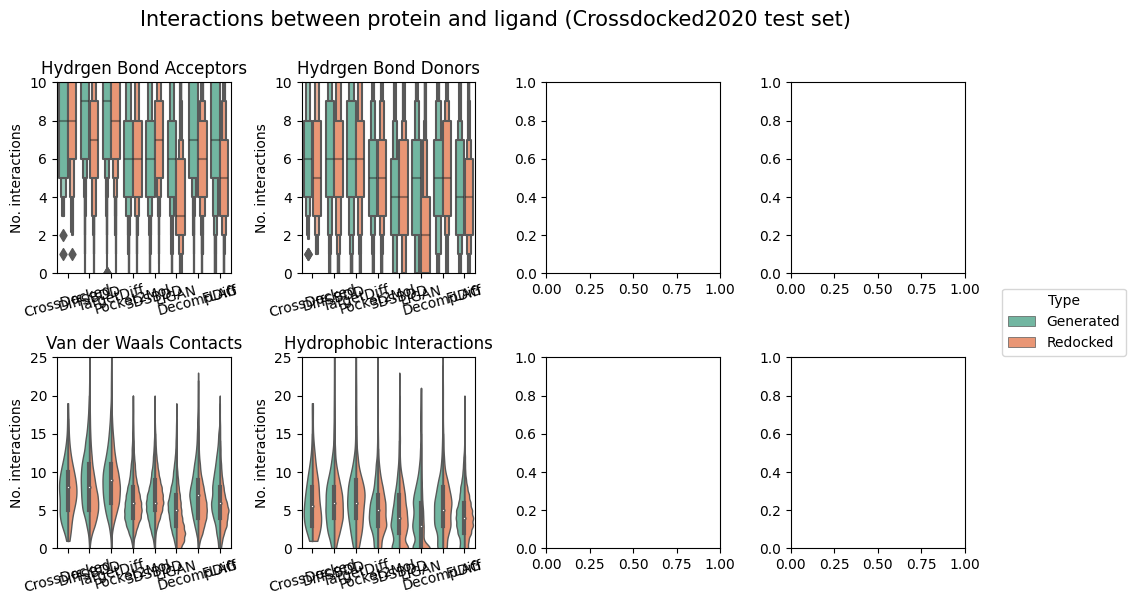

In [23]:
interactions_types = [["HBAcceptor", "HBDonor"], ["VdWContact", "Hydrophobic"]]

titles = [
    ["Hydrgen Bond Acceptors", "Hydrgen Bond Donors"],
    ["Van der Waals Contacts", "Hydrophobic Interactions"],
]

# 3 subplots
fig, axs = plt.subplots(2, 4, figsize=(10, 6), tight_layout=True)

for i in range(2):
    for j in range(2):
        if i == 0:
            sns.boxenplot(
                x="Method",
                y=interactions_types[i + 1][j],
                hue="Type",
                ax=axs[i, j],
                data=data,
                palette="Set2",
                dodge=True,
                k_depth="trustworthy",
            )
        else:
            sns.violinplot(
                x="Method",
                y=interactions_types[i][j],
                data=data,
                ax=axs[i, j],
                hue="Type",  # scale_hue=True,# gridsize=20,
                split=True,
                inner="box",
                cut=0,
                linewidth=1,
                scale="width",
                palette="Set2",
                
                dodge=True,
            )

        # sns.boxplot(x='Method', y=interactions_types[i][j], data=data, ax=axs[i,j], hue='Type', #scale_hue=True,# gridsize=20,
        #            linewidth=1, palette='Set2', dodge=False,
        #            showfliers=False)

        axs[i, j].set_xticklabels(
            axs[i, j].get_xticklabels(), rotation=15
        )  # , ha='right')
        axs[i, j].set_ylabel("No. interactions")
        axs[i, j].set_xlabel("")
        axs[i, j].set_title(titles[i][j])

        if i == 1 and j == 1:
            # shift to central right of main figure
            # axs[i,j].legend(loc='upper right', bbox_to_anchor=(1.2, 1.2), ncol=1)
            legend = axs[i, j].get_legend()
            axs[i, j].get_legend().remove()
        else:
            axs[i, j].get_legend().remove()


axs[0, 0].set_ylim(0, 10)
axs[0, 1].set_ylim(0, 10)
axs[1, 0].set_ylim(0, 25)
axs[1, 1].set_ylim(0, 25)


# Get the handles and labels of the legend on the first axis
handles, labels = axs[1, 1].get_legend_handles_labels()

# Create a new legend for the figure using the handles and labels from the first axis
fig.legend(
    handles, labels, bbox_to_anchor=(1.0, 0.48), loc="center left", title="Type", ncol=1
)

plt.suptitle(
    "Interactions between protein and ligand (Crossdocked2020 test set)",
    fontsize=15,
    y=1,
)

plt.savefig("figures/generated_interactions.pdf", bbox_inches="tight")

IndexError: index 6 is out of bounds for axis 0 with size 6

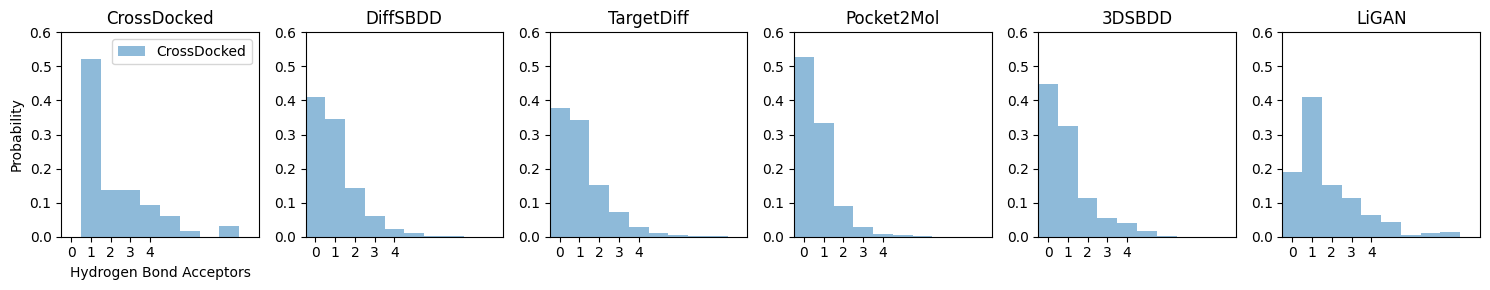

In [24]:
# 5 subplots for each dataset
fig, axs = plt.subplots(1, 6, figsize=(15, 3), tight_layout=True)

# plot hist of hydrogen bond acceptors in each subplot
for i, method in enumerate(data["Method"].unique()):
    # sns.histplot(data=data[data['Method'] == method], x='HBAcceptor', hue='Type', ax=axs[i], kde=True, stat='probability', common_norm=False, palette='Set2', alpha=0.5, label=method)
    info = data[data["Method"] == method]
    info = info[info["Type"] == "Generated"]
    axs[i].hist(
        info["HBAcceptor"],
        bins=10,
        density=True,
        alpha=0.5,
        label=method,
        range=(0, 10),
    )
    axs[0].set_xlabel("Hydrogen Bond Acceptors")
    axs[0].set_ylabel("Probability")
    axs[i].set_title(method)
    axs[0].legend(loc="upper right")
    axs[i].set_xlim(0, 10)
    axs[i].set_ylim(0, 0.6)
    axs[i].set_xticks([0.5, 1.5, 2.5, 3.5, 4.5], ["0", "1", "2", "3", "4"])

---    Mean   Median   Mode ---
CrossDocked: 1.66 1.00 1.00
DiffSBDD: 0.58 0.00 0.00
TargetDiff: 0.74 1.00 0.00
Pocket2Mol: 0.39 0.00 0.00
3DSBDD: 0.62 0.00 0.00
LiGAN: 0.85 1.00 0.00


Text(0, 0.5, 'Cumulative Probability')

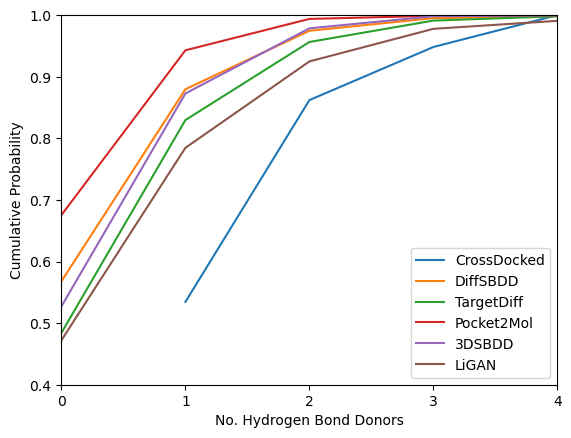

In [10]:
# plot hist of hydrogen bond acceptors in each subplot
print("---    Mean   Median   Mode ---")
for i, method in enumerate(data["Method"].unique()):
    # sns.histplot(data=data[data['Method'] == method], x='HBAcceptor', hue='Type', ax=axs[i], kde=True, stat='probability', common_norm=False, palette='Set2', alpha=0.5, label=method)
    info = data[data["Method"] == method]
    info = info[info["Type"] == "Generated"]

    h_bonds = info["HBDonor"]
    # print mean median and mode to 2dp
    print(
        f"{method}: {h_bonds.mean():.2f} {h_bonds.median():.2f} {h_bonds.mode()[0]:.2f}"
    )
    # calculate the cumulative distribution function
    cdf = np.cumsum(h_bonds.value_counts(normalize=True).sort_index())
    plt.plot(cdf, label=method)
plt.legend(loc="lower right")
max_x = 4
plt.xticks(range(0, max_x + 1))
plt.xlim(0, max_x)
plt.ylim(0.4, 1)
plt.xlabel("No. Hydrogen Bond Donors")
plt.ylabel("Cumulative Probability")

<Axes: xlabel='Method', ylabel='HBAcceptor'>

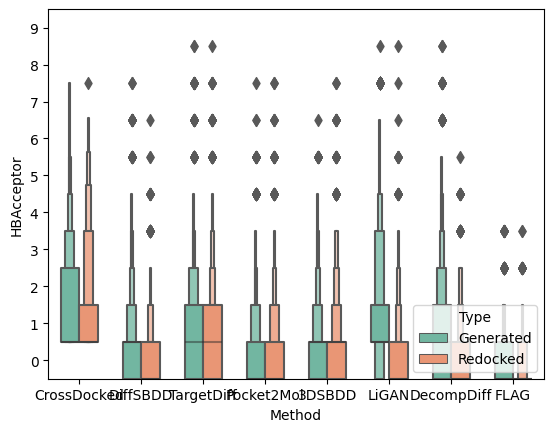

In [25]:
plt.yticks(np.arange(0, 10) + 0.5, range(0, 10))
plt.ylim(0, 10)

sns.boxenplot(
    x="Method",
    y=interactions_types[0][0],
    hue="Type",
    data=data,
    palette="Set2",
    dodge=True,
    k_depth=5,
    outlier_prop=1,
    width=0.6,
    # linewidth=1,
    scale="exponential",
)

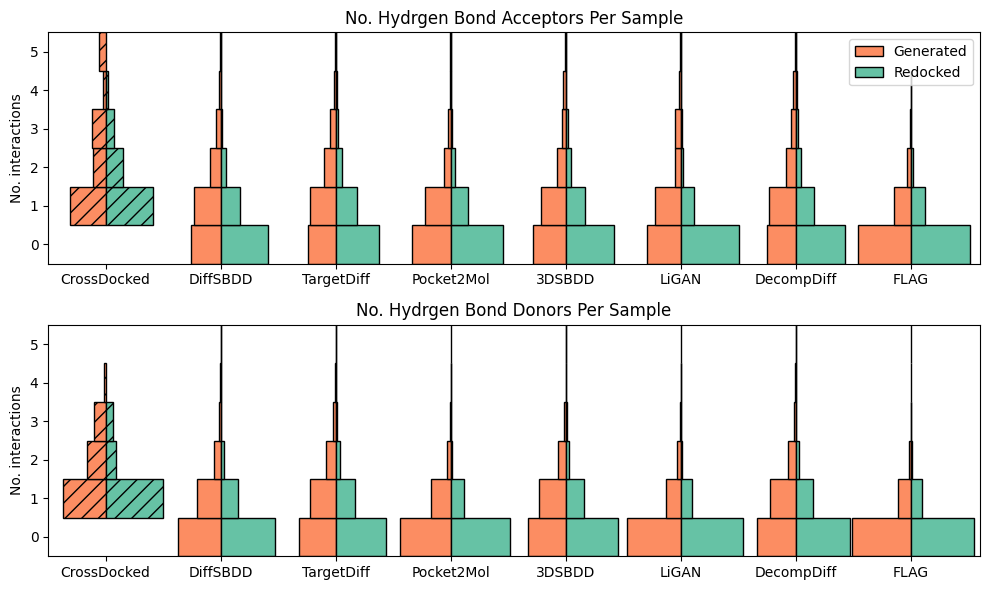

In [19]:
data[data['Method'] == 'CrossDocked']

h_bonds = data[data['Method'] == 'CrossDocked']['HBDonor']

interactions_types = ["HBAcceptor", "HBDonor"]
titles = ["Hydrgen Bond Acceptors", "Hydrgen Bond Donors"]

hist = np.histogram(h_bonds, bins=10, range=(0, 10), density=True)

# plot hist as rectangles

fig, axs = plt.subplots(2, 1, figsize=(10, 6), tight_layout=True)

SCALE = 0.65
MAX_Y = 6

for i, ax in enumerate(axs):
    
    # plot grey rectangles over crossdocked data
    #ax.add_patch(plt.Rectangle((0, 0), 1, 10, facecolor='grey', alpha=0.5))
    
    for j, method in enumerate(data['Method'].unique()):
        
        # generated
        method_data = data[data['Method'] == method]
        hist = np.histogram(method_data[method_data['Type'] == 'Generated'][interactions_types[i]], bins=10, range=(0, 10), density=True)
        
        for count, value in zip(hist[0], hist[1]):
            if count > 0:
                ax.add_patch(plt.Rectangle((0.5 + j - count*SCALE, value), count*SCALE, 1, 
                                           facecolor=sns.color_palette('Set2')[1],
                                           hatch='//' if j == 0 else '',
                                           edgecolor='black',
                                           alpha=1))
                
        # redocked
        method_data = data[data['Method'] == method]
        hist = np.histogram(method_data[method_data['Type'] == 'Redocked'][interactions_types[i]], bins=10, range=(0, 10), density=True)
                
        for count, value in zip(hist[0], hist[1]):
            if count > 0:
                ax.add_patch(plt.Rectangle((0.5 + j, value), count*SCALE, 1,
                                            facecolor=sns.color_palette('Set2')[0],
                                            hatch='//' if j == 0 else '',
                                            edgecolor='black',
                                           alpha=1))
        
    ax.set_xlim(0, 8.1)
    ax.set_ylim(0, MAX_Y)
    
    ax.set_xticks(np.arange(0, 8) + 0.5, data['Method'].unique())
    ax.set_yticks(np.arange(0, MAX_Y) + 0.5, range(0, MAX_Y))
    ax.set_ylabel("No. interactions")
    ax.set_title(f'No. {titles[i]} Per Sample')
    
# add legend
axs[0].add_patch(plt.Rectangle((0, 0), 0, 0, facecolor=sns.color_palette('Set2')[1], edgecolor='black', alpha=1, label='Generated'))
axs[0].add_patch(plt.Rectangle((0, 0), 0, 0, facecolor=sns.color_palette('Set2')[0], edgecolor='black', alpha=1, label='Redocked'))
axs[0].legend(loc='upper right')
plt.savefig('figures/interaction_histograms.pdf', bbox_inches='tight')

#### Minimized

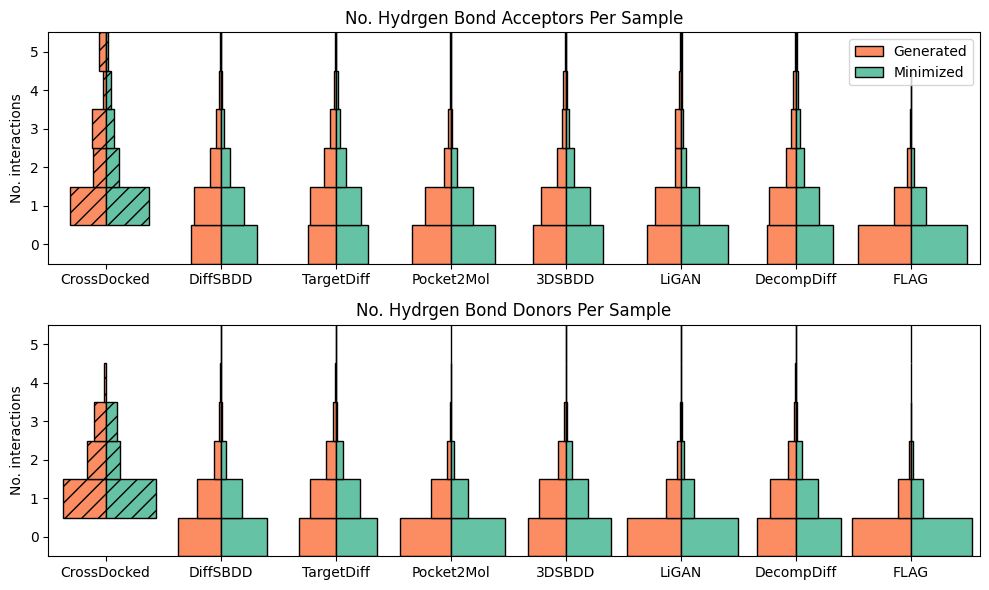

In [21]:
data[data['Method'] == 'CrossDocked']

h_bonds = data[data['Method'] == 'CrossDocked']['HBDonor']

interactions_types = ["HBAcceptor", "HBDonor"]
titles = ["Hydrgen Bond Acceptors", "Hydrgen Bond Donors"]

hist = np.histogram(h_bonds, bins=10, range=(0, 10), density=True)

# plot hist as rectangles

fig, axs = plt.subplots(2, 1, figsize=(10, 6), tight_layout=True)

SCALE = 0.65
MAX_Y = 6

for i, ax in enumerate(axs):
    
    # plot grey rectangles over crossdocked data
    #ax.add_patch(plt.Rectangle((0, 0), 1, 10, facecolor='grey', alpha=0.5))
    
    for j, method in enumerate(data['Method'].unique()):
        
        # generated
        method_data = data[data['Method'] == method]
        hist = np.histogram(method_data[method_data['Type'] == 'Generated'][interactions_types[i]], bins=10, range=(0, 10), density=True)
        
        for count, value in zip(hist[0], hist[1]):
            if count > 0:
                ax.add_patch(plt.Rectangle((0.5 + j - count*SCALE, value), count*SCALE, 1, 
                                           facecolor=sns.color_palette('Set2')[1],
                                           hatch='//' if j == 0 else '',
                                           edgecolor='black',
                                           alpha=1))
                
        # redocked
        method_data = data[data['Method'] == method]
        hist = np.histogram(method_data[method_data['Type'] == 'Minimized'][interactions_types[i]], bins=10, range=(0, 10), density=True)
                
        for count, value in zip(hist[0], hist[1]):
            if count > 0:
                ax.add_patch(plt.Rectangle((0.5 + j, value), count*SCALE, 1,
                                            facecolor=sns.color_palette('Set2')[0],
                                            hatch='//' if j == 0 else '',
                                            edgecolor='black',
                                           alpha=1))
        
    ax.set_xlim(0, 8.1)
    ax.set_ylim(0, MAX_Y)
    
    ax.set_xticks(np.arange(0, 8) + 0.5, data['Method'].unique())
    ax.set_yticks(np.arange(0, MAX_Y) + 0.5, range(0, MAX_Y))
    ax.set_ylabel("No. interactions")
    ax.set_title(f'No. {titles[i]} Per Sample')
    
# add legend
axs[0].add_patch(plt.Rectangle((0, 0), 0, 0, facecolor=sns.color_palette('Set2')[1], edgecolor='black', alpha=1, label='Generated'))
axs[0].add_patch(plt.Rectangle((0, 0), 0, 0, facecolor=sns.color_palette('Set2')[0], edgecolor='black', alpha=1, label='Minimized'))
axs[0].legend(loc='upper right')
plt.savefig('figures/interaction_histograms.pdf', bbox_inches='tight')

/tmp/ipykernel_44688/1079614324.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(y="HBAcceptor", data=data[data['Method'] == 'CrossDocked'], palette="Set2")
/home/cch57/micromamba/envs/poses/lib/python3.11/site-packages/seaborn/_oldcore.py:1134: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_data.insert(0, var, comp_col)


ValueError: cannot reindex on an axis with duplicate labels

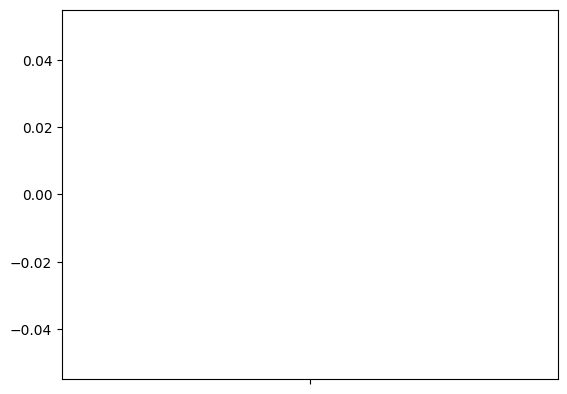

In [82]:
sns.swarmplot(y="HBAcceptor", data=data[data['Method'] == 'CrossDocked'], palette="Set2")

/home/cch57/micromamba/envs/poses/lib/python3.11/site-packages/seaborn/_oldcore.py:1134: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_data.insert(0, var, comp_col)


ValueError: cannot reindex on an axis with duplicate labels

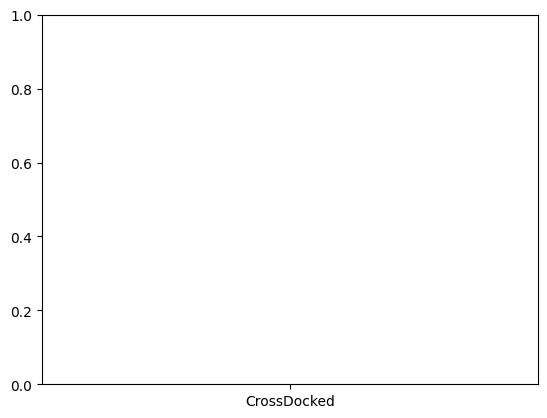

In [80]:
sns.swarmplot(x="Method", y="HBAcceptor", data=data[data['Method'] == 'CrossDocked'], hue="Type", palette="Set2")

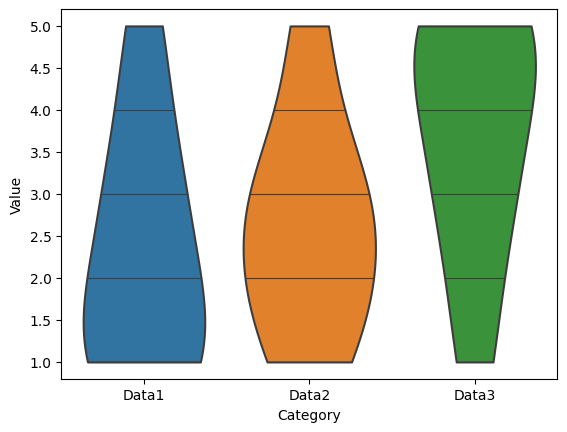

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Generate some example data
data1 = [1, 2, 3, 2, 3, 1, 1, 1, 4, 5]
data2 = [2, 2, 3, 3, 4, 1, 1, 2, 3, 5]
data3 = [5, 5, 4, 4, 3, 5, 5, 3, 2, 1]

# Create a DataFrame
df = pd.DataFrame({'Data1': data1, 'Data2': data2, 'Data3': data3})

# Create a "melted" DataFrame for Seaborn plotting
df_melted = pd.melt(df, var_name='Category', value_name='Value')

# Create the violinplot
sns.violinplot(x="Category", y="Value", data=df_melted, inner='stick', cut=0)
plt.show()


/home/cch57/micromamba/envs/poses/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


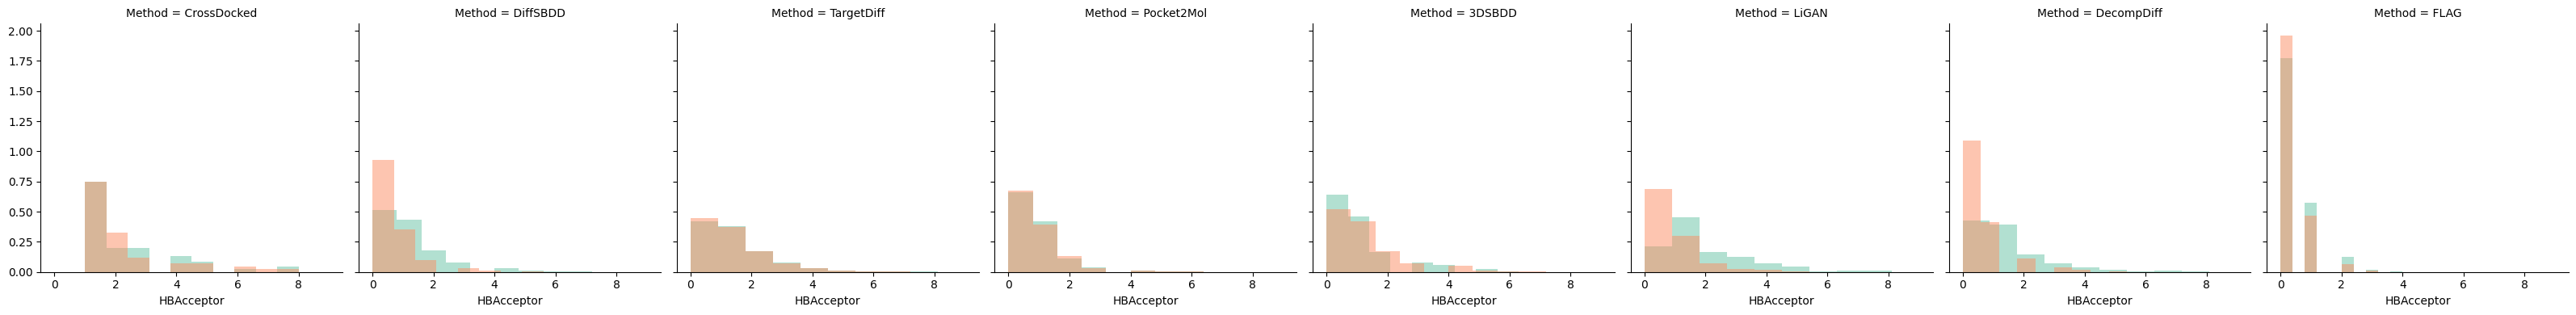

In [74]:
sns.FacetGrid(data, col="Method", hue="Type", palette="Set2", height=4).map(
    plt.hist, "HBAcceptor", alpha=0.5, bins=10, density=True
)

TypeError: boxenplot() got an unexpected keyword argument 'patch_artist'

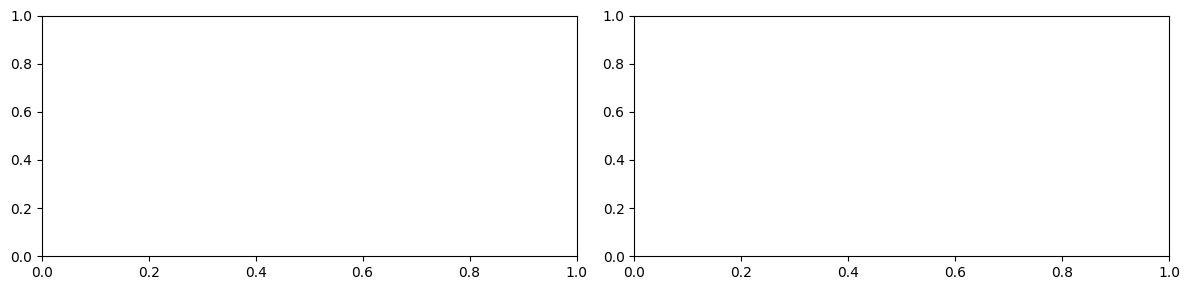

In [69]:
interactions_types = [["HBAcceptor", "HBDonor"], ["VdWContact", "Hydrophobic"]]

titles = [
    ["Hydrogen Bond Acceptors", "Hydrogen Bond Donors"],
    ["Van der Waals Contacts", "Hydrophobic Interactions"],
]

# 3 subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 3), tight_layout=True)

for j in range(2):
    boxes = sns.boxenplot(
                x="Method",
                y=interactions_types[i][j],
                hue="Type",
                ax=axs[j],
                data=data,
                palette="Set2",
                dodge=True,
                k_depth=5,
                outlier_prop=1,
                showfliers=False,
                flier_kws={"marker": "x", "s": 10},
                width=0.8,
                # linewidth=1,
                scale="exponential",
            )
    
    # shade in the 1st set of crossdocked boxes
    #boxes.patches[1].set_hatch("/////")
    
    boxes.patches[0].set_facecolor("white")
    
    

    # plt.yticks(np.arange(0, 10) + 0.5, range(0, 10))
    # plt.ylim(0, 10)
    max_y = 7
    axs[j].set_ylim(0, max_y)
    axs[j].set_yticks(np.arange(0, max_y) + 0.5, range(0, max_y))



    axs[j].set_xticklabels(
        axs[j].get_xticklabels(), rotation=15
    )  # , ha='right')
    axs[j].set_ylabel("No. interactions")
    axs[j].set_xlabel("")
    axs[j].set_title(titles[i][j])

    # if i == 1 and j == 1:
    #     # shift to central right of main figure
    #     # axs[i,j].legend(loc='upper right', bbox_to_anchor=(1.2, 1.2), ncol=1)
    #     legend = axs[i, j].get_legend()
    #     axs[j].get_legend().remove()
    # else:
    #     axs[j].get_legend().remove()

axs[0].get_legend().remove()
axs[1].get_legend().remove()
# Get the handles and labels of the legend on the first axis
handles, labels = axs[1].get_legend_handles_labels()

# Create a new legend for the figure using the handles and labels from the first axis
fig.legend(
    handles,
    labels,
    #bbox_to_anchor=(0.5, -0.15),
    bbox_to_anchor=(1, 0.4),
    loc="lower center",
    title="Type",
    ncol=1,
)

# plt.suptitle('Interactions between protein and ligand (Crossdocked2020 test set)', fontsize=15, y=1)
plt.tight_layout()
plt.savefig("figures/generated_interactions.pdf", bbox_inches="tight")

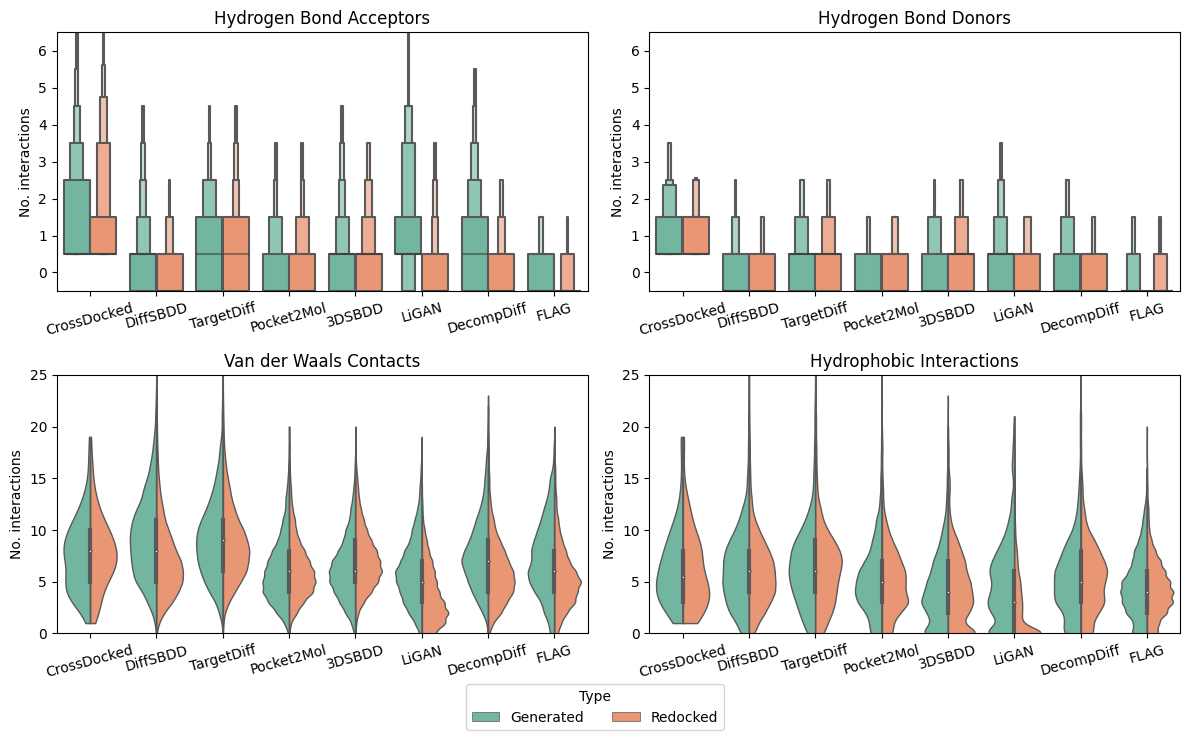

In [26]:
interactions_types = [["HBAcceptor", "HBDonor"], ["VdWContact", "Hydrophobic"]]

titles = [
    ["Hydrogen Bond Acceptors", "Hydrogen Bond Donors"],
    ["Van der Waals Contacts", "Hydrophobic Interactions"],
]

# 3 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 7), tight_layout=True)

for i in range(2):
    for j in range(2):
        if i == 0:
            sns.boxenplot(
                x="Method",
                y=interactions_types[i][j],
                hue="Type",
                ax=axs[i, j],
                data=data,
                palette="Set2",
                dodge=True,
                k_depth=5,
                outlier_prop=1,
                showfliers=False,
                flier_kws={"marker": "x", "s": 10},
                width=0.8,
                # linewidth=1,
                scale="exponential",
            )

            # plt.yticks(np.arange(0, 10) + 0.5, range(0, 10))
            # plt.ylim(0, 10)
            max_y = 7
            axs[i, j].set_ylim(0, max_y)
            axs[i, j].set_yticks(np.arange(0, max_y) + 0.5, range(0, max_y))
        else:
            sns.violinplot(
                x="Method",
                y=interactions_types[i][j],
                data=data,
                ax=axs[i, j],
                hue="Type",  # scale_hue=True,# gridsize=20,
                split=True,
                inner="box",
                cut=0,
                linewidth=1,
                scale="width",
                palette="Set2",
                dodge=True,
            )

        # sns.boxplot(x='Method', y=interactions_types[i][j], data=data, ax=axs[i,j], hue='Type', #scale_hue=True,# gridsize=20,
        #            linewidth=1, palette='Set2', dodge=False,
        #            showfliers=False)

        axs[i, j].set_xticklabels(
            axs[i, j].get_xticklabels(), rotation=15
        )  # , ha='right')
        axs[i, j].set_ylabel("No. interactions")
        axs[i, j].set_xlabel("")
        axs[i, j].set_title(titles[i][j])

        if i == 1 and j == 1:
            # shift to central right of main figure
            # axs[i,j].legend(loc='upper right', bbox_to_anchor=(1.2, 1.2), ncol=1)
            legend = axs[i, j].get_legend()
            axs[i, j].get_legend().remove()
        else:
            axs[i, j].get_legend().remove()


# axs[0,0].set_ylim(0, 10)
# axs[0,1].set_ylim(0, 10)
axs[1, 0].set_ylim(0, 25)
axs[1, 1].set_ylim(0, 25)


# Get the handles and labels of the legend on the first axis
handles, labels = axs[1, 1].get_legend_handles_labels()

# Create a new legend for the figure using the handles and labels from the first axis
fig.legend(
    handles,
    labels,
    bbox_to_anchor=(0.5, -0.06),
    loc="lower center",
    title="Type",
    ncol=2,
)

# plt.suptitle('Interactions between protein and ligand (Crossdocked2020 test set)', fontsize=15, y=1)

plt.savefig("figures/generated_interactions.pdf", bbox_inches="tight")

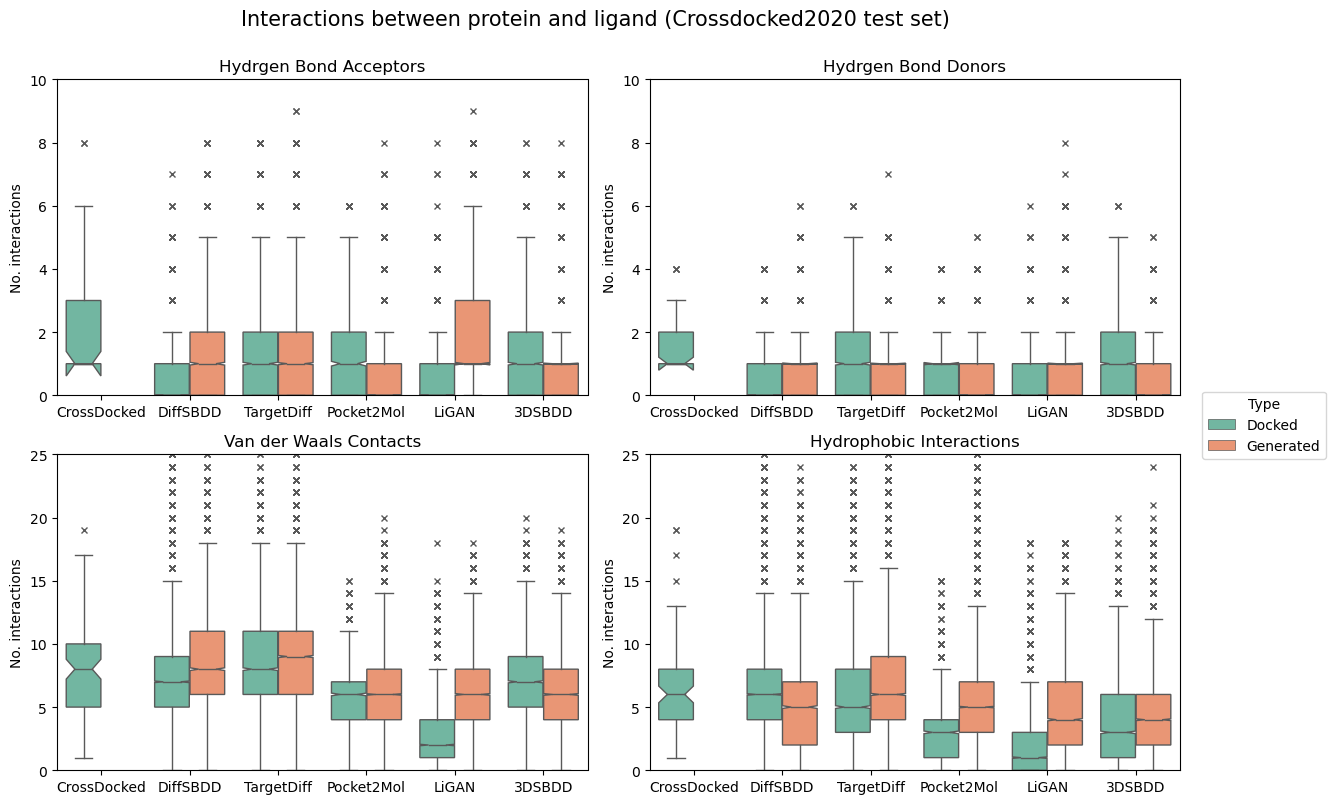

In [155]:
interactions_types = [["HBAcceptor", "HBDonor"], ["VdWContact", "Hydrophobic"]]

titles = [
    ["Hydrgen Bond Acceptors", "Hydrgen Bond Donors"],
    ["Van der Waals Contacts", "Hydrophobic Interactions"],
]

# 3 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)

for i in range(2):
    for j in range(2):
        sns.boxplot(
            x="Method",
            y=interactions_types[i][j],
            data=data,
            ax=axs[i, j],
            hue="Type",  # scale_hue=True,# gridsize=20,
            flierprops={"marker": "x"},
            notch=True,
            linewidth=1,
            palette="Set2",
            dodge=True,
        )

        # sns.boxplot(x='Method', y=interactions_types[i][j], data=data, ax=axs[i,j], hue='Type', #scale_hue=True,# gridsize=20,
        #            linewidth=1, palette='Set2', dodge=False,
        #            showfliers=False)

        # axs[i,j].set_xticklabels(axs[i,j].get_xticklabels(), rotation=15)#, ha='right')
        axs[i, j].set_ylabel("No. interactions")
        axs[i, j].set_xlabel("")
        axs[i, j].set_title(titles[i][j])

        if i == 1 and j == 1:
            # shift to central right of main figure
            # axs[i,j].legend(loc='upper right', bbox_to_anchor=(1.2, 1.2), ncol=1)
            legend = axs[i, j].get_legend()
            axs[i, j].get_legend().remove()
        else:
            axs[i, j].get_legend().remove()


axs[0, 0].set_ylim(0, 10)
axs[0, 1].set_ylim(0, 10)
axs[1, 0].set_ylim(0, 25)
axs[1, 1].set_ylim(0, 25)


# Get the handles and labels of the legend on the first axis
handles, labels = axs[1, 1].get_legend_handles_labels()

# Create a new legend for the figure using the handles and labels from the first axis
fig.legend(
    handles, labels, bbox_to_anchor=(1.0, 0.48), loc="center left", title="Type", ncol=1
)

plt.suptitle(
    "Interactions between protein and ligand (Crossdocked2020 test set)",
    fontsize=15,
    y=1,
)

plt.savefig("figures/generated_interactions.pdf", bbox_inches="tight")

### Interaction Similarity Analysis

In [13]:
def merge_interaction_dfs(ref_df: pd.DataFrame, df: pd.DataFrame):
    """Merge two interaction DataFrames into one."""

    if df is None or df.empty:
        return None

    ref_df.rename({0: "ref"}, inplace=True)
    # drop the ligand level on both dataframes
    # ref_df.columns = ref_df.columns.droplevel(0)
    # df.columns = df.columns.droplevel(0)
    # concatenate and sort columns
    df = (
        pd.concat([ref_df, df])
        .fillna(False)
        .sort_index(
            axis=1,
            level=0,
            key=lambda index: [plf.ResidueId.from_string(x) for x in index],
        )
    )
    return df

In [32]:
len(diffsbdd_interactions), len(targetdiff_interactions), len(cvae_interactions), len(
    sbdd_interactions
), len(p2m_interactions)

(100, 100, 100, 100, 100)

In [ ]:
diffsbdd = []
zinc = []
targetdiff = []
cvae = []
sbdd = []
p2m = []

diffsbdd_docked = []
targetdiff_docked = []
cvae_docked = []
sbdd_docked = []
p2m_docked = []


for i in range(100):
    print(i)

    diffsbdd.append(
        calculate_interaction_similarity(
            merge_interaction_dfs(
                deepcopy(crossdocked_generated_interactions[i]),
                deepcopy(diffsbdd_generated_interactions[i]),
            )
        )
    )
    # zinc.extend(calculate_interaction_similarity(merge_interaction_dfs(deepcopy(crossdocked_interactions[i]), deepcopy(zinc_interactions[i]))))
    targetdiff.append(
        calculate_interaction_similarity(
            merge_interaction_dfs(
                deepcopy(crossdocked_generated_interactions[i]),
                deepcopy(targetdiff_generated_interactions[i]),
            )
        )
    )
    cvae.append(
        calculate_interaction_similarity(
            merge_interaction_dfs(
                deepcopy(crossdocked_generated_interactions[i]),
                deepcopy(cvae_generated_interactions[i]),
            )
        )
    )
    sbdd.append(
        calculate_interaction_similarity(
            merge_interaction_dfs(
                deepcopy(crossdocked_generated_interactions[i]),
                deepcopy(sbdd_generated_interactions[i]),
            )
        )
    )
    p2m.append(
        calculate_interaction_similarity(
            merge_interaction_dfs(
                deepcopy(crossdocked_generated_interactions[i]),
                deepcopy(p2m_generated_interactions[i]),
            )
        )
    )

    diffsbdd_docked.append(
        calculate_interaction_similarity(
            merge_interaction_dfs(
                deepcopy(crossdocked_generated_interactions[i]),
                deepcopy(diffsbdd_docked_interactions[i]),
            )
        )
    )
    targetdiff_docked.append(
        calculate_interaction_similarity(
            merge_interaction_dfs(
                deepcopy(crossdocked_generated_interactions[i]),
                deepcopy(targetdiff_docked_interactions[i]),
            )
        )
    )
    cvae_docked.append(
        calculate_interaction_similarity(
            merge_interaction_dfs(
                deepcopy(crossdocked_generated_interactions[i]),
                deepcopy(cvae_docked_interactions[i]),
            )
        )
    )
    sbdd_docked.append(
        calculate_interaction_similarity(
            merge_interaction_dfs(
                deepcopy(crossdocked_generated_interactions[i]),
                deepcopy(sbdd_docked_interactions[i]),
            )
        )
    )
    p2m_docked.append(
        calculate_interaction_similarity(
            merge_interaction_dfs(
                deepcopy(crossdocked_generated_interactions[i]),
                deepcopy(p2m_docked_interactions[i]),
            )
        )
    )

In [33]:
p2m_docked_interactions[0].empty

True

In [28]:
for i in range(100):
    print(i)
p2m_docked.extend(
    calculate_interaction_similarity(
        merge_interaction_dfs(
            deepcopy(crossdocked_generated_interactions[i]),
            deepcopy(p2m_docked_interactions[i]),
        )
    )
)

0
12
14
91
98


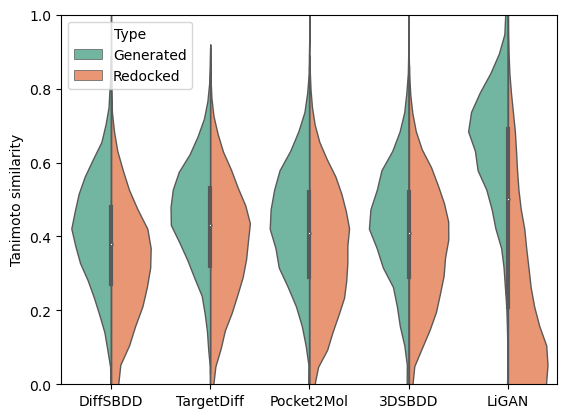

In [27]:
# turn into dataframe
dfs = []

order = ["DiffSBDD", "TargetDiff", "Pocket2Mol", "3DSBDD", "LiGAN"]

for ineraction_scores, name in zip([diffsbdd, targetdiff, p2m, sbdd, cvae], order):
    df = pd.DataFrame(ineraction_scores, columns=["Similarity"])
    df["Method"] = name
    df["Type"] = "Generated"
    dfs.append(df)

for ineraction_scores, name in zip(
    [zinc, diffsbdd_docked, targetdiff_docked, cvae_docked, sbdd_docked, p2m_docked],
    ["ZINC", "DiffSBDD", "TargetDiff", "LiGAN", "3DSBDD", "Pocket2Mol"],
):
    df = pd.DataFrame(ineraction_scores, columns=["Similarity"])
    df["Method"] = name
    df["Type"] = "Redocked"
    dfs.append(df)

df = pd.concat(dfs, axis=0)

sns.violinplot(
    x="Method",
    y="Similarity",
    data=df,
    hue="Type",
    scale_hue=False,
    gridsize=20,
    palette="Set2",
    split=True,
    inner="box",
    cut=0,
    linewidth=1,
    scale="width",
    dodge=True,
)

plt.xlabel(""), plt.ylabel("Tanimoto similarity"), plt.ylim(0, 1)
plt.savefig("figures/interaction_sim.pdf", bbox_inches="tight")

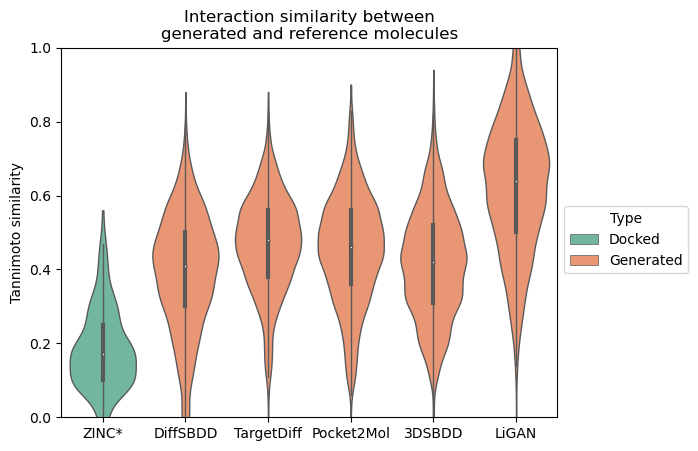

In [34]:
sns.violinplot(
    data=[zinc, diffsbdd, targetdiff, p2m, sbdd, cvae],
    palette=[sns.color_palette("Set2")[0]] + 5 * [sns.color_palette("Set2")[1]],
    cut=0,
    linewidth=1,
    scale="width",
    dodge=False,
)

plt.xticks(
    [0, 1, 2, 3, 4, 5],
    ["ZINC*", "DiffSBDD", "TargetDiff", "Pocket2Mol", "3DSBDD", "LiGAN"],
)
plt.title("Interaction similarity between\ngenerated and reference molecules")
plt.ylim(0, 1)
plt.ylabel("Tannimoto similarity")
plt.legend(
    handles, labels, bbox_to_anchor=(1.0, 0.48), loc="center left", title="Type", ncol=1
)

# save as pdf
plt.savefig("figures/interaction_sim.pdf", bbox_inches="tight")

In [80]:
# turn into dataframe
dfs = []

order = ["DiffSBDD", "TargetDiff", "Pocket2Mol", "3DSBDD", "LiGAN"]

for ineraction_scores, name in zip([diffsbdd, targetdiff, p2m, sbdd, cvae], order):
    tmp_dfs = []
    for i in range(100):
        # print( i, len(ineraction_scores))
        try:
            df = pd.DataFrame(ineraction_scores[i], columns=["Similarity"])
        except:
            print(i)
            print(ineraction_scores[i])
            break
        df["Target"] = i
        tmp_dfs.append(df)

    df = pd.concat(tmp_dfs, axis=0)
    df["Method"] = name
    df["Type"] = "Generated"
    dfs.append(df)

for ineraction_scores, name in zip(
    [diffsbdd_docked, targetdiff_docked, cvae_docked, sbdd_docked, p2m_docked],
    ["DiffSBDD", "TargetDiff", "LiGAN", "3DSBDD", "Pocket2Mol"],
):
    tmp_dfs = []
    for i in range(100):
        df = pd.DataFrame(ineraction_scores[i], columns=["Similarity"])
        df["Target"] = i
        tmp_dfs.append(df)

    df = pd.concat(tmp_dfs, axis=0)
    df["Method"] = name
    df["Type"] = "Redocked"
    dfs.append(df)

df = pd.concat(dfs, axis=0)

/var/folders/38/9bdhd5_93c3bfmchy1pn4yj80000gn/T/ipykernel_66081/917344698.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targetdiff_generated_df['Target'] = pd.Categorical(targetdiff_generated_df['Target'], order)


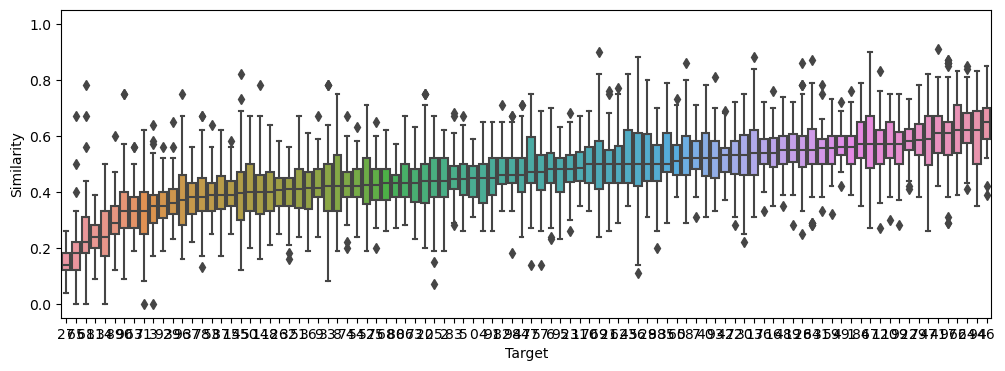

In [82]:
# plot for targetdiff

fig, axs = plt.subplots(1, 1, figsize=(12, 4))

# order by median of targetdiff generated
targetdiff_generated_df = df[
    (df["Method"] == "TargetDiff") & (df["Type"] == "Generated")
]

order = (
    targetdiff_generated_df.groupby("Target")["Similarity"].median().sort_values().index
)
targetdiff_generated_df["Target"] = pd.Categorical(
    targetdiff_generated_df["Target"], order
)

# select generated and targetdiff
sns.boxplot(
    x="Target",
    y="Similarity",
    data=targetdiff_generated_df,
    ax=axs,
    hue_order=["Generated"],
)
plt.plot(0, 1)